# IBM Applied Data Science Capstone Course by Coursera

### Week 5 Final Report  

#### _Finding ideal hotels in Singapore_

1. Build a dataframe of neighborhoods in Kuala Lumpur, Malaysia by web scraping the data from Wikipedia page <p>
2. Get the geographical coordinates of the neighborhoods <p>
3. Obtain the venue data for the neighborhoods from Foursquare API <p>
4. Explore and cluster the neighborhoods <p>
5. Select the best cluster to open a new shopping mall

### Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!pip install geocoder
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Scrap data from Wikipedia page into a DataFrame

In [2]:
# send the GET request
result = requests.get('https://en.wikipedia.org/wiki/List_of_hotels_in_Singapore').text

In [3]:
# parse data from the html into a beautifulsoup object
soup=BeautifulSoup(result,"html.parser")
#print(soup.prettify())

In [4]:
# create a list to store neighborhood data
neighborhoodList = []

In [5]:
#b=soup.find_all("div", class_="mw-parser-output")[0].find_all('ul')[2].find_all('li')
#print(b)
#for line in b:
    #n=line.a.text
    #print(n)

In [6]:
# append the data into the list
for i in range(2,8):
    for b in soup.find_all("div", class_="mw-parser-output")[0].find_all('ul')[i].find_all('li'):
        for line in b:
            neighborhoodList.append(line.text)
for b in soup.find_all("div", class_="mw-parser-output")[0].find_all('ul')[9].find_all('li'):
    for line in b:
        neighborhoodList.append(line.text)

In [7]:
kl_df = pd.DataFrame({"Neighborhood": neighborhoodList})

kl_df.shape

(30, 1)

In [8]:
kl_df

,Neighborhood
0,Naumi Hotel
1,Damenlou Hotel
2,New Majestic Hotel
3,The Scarlet Hotel
4,Garcha Hotels
5,Parkroyal on Pickering
6,Raffles Hotel
7,Fairmont Singapore
8,Strand Hotel
9,Swissôtel The Stamford


### Get the geographical coordinates

In [9]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Singapore, Singapore '.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [10]:
coords = [ get_latlng(neighborhood) for neighborhood in kl_df["Neighborhood"].tolist() ]

In [11]:
coords

[[1.29577006217901, 103.85509006217903],
 [1.273697999999996, 103.84506450000003],
 [1.279323000000005, 103.8403755],
 [1.2807800000000498, 103.84529000000003],
 [1.2883500000000083, 103.84785449999998],
 [1.2858800183218952, 103.84571996335633],
 [1.2946500516474075, 103.85480999105594],
 [1.294240018321934, 103.85386996335633],
 [1.2984900732875158, 103.84993999220977],
 [1.2932000000000698, 103.85375000000005],
 [1.2935899888915563, 103.85896994113932],
 [1.2856100000000197, 103.85280000000006],
 [1.2832500000000664, 103.85971000000006],
 [1.2912200000000666, 103.85874000000007],
 [1.290230000000065, 103.85819000000004],
 [1.3076900000000364, 103.83013000000005],
 [1.2906990000000036, 103.8597795],
 [1.3088899300308405, 103.83420002668913],
 [1.3060299849964108, 103.8294499705697],
 [1.2889199705697052, 103.83467993334908],
 [1.3019200000000524, 103.83569000000006],
 [1.3074700000000234, 103.83279000000005],
 [1.3115609999999975, 103.82651099999998],
 [1.3058200000000397, 103.825850

In [12]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [13]:
# merge the coordinates into the original dataframe
kl_df['Latitude'] = df_coords['Latitude']
kl_df['Longitude'] = df_coords['Longitude']

In [14]:
print(kl_df.shape)
kl_df

(30, 3)


,Neighborhood,Latitude,Longitude
0,Naumi Hotel,1.295770,103.855090
1,Damenlou Hotel,1.273698,103.845065
2,New Majestic Hotel,1.279323,103.840375
3,The Scarlet Hotel,1.280780,103.845290
4,Garcha Hotels,1.288350,103.847854
5,Parkroyal on Pickering,1.285880,103.845720
6,Raffles Hotel,1.294650,103.854810
7,Fairmont Singapore,1.294240,103.853870
8,Strand Hotel,1.298490,103.849940
9,Swissôtel The Stamford,1.293200,103.853750


In [15]:
# save the DataFrame as CSV file
kl_df.to_csv("kl_df.csv", index=False)

### Explore Neighborhoods in Singapore

In [16]:
address = 'Singapore'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 1.357107, 103.8194992.


In [17]:
# create map of Singapore using latitude and longitude values
map_kl = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(kl_df['Latitude'], kl_df['Longitude'], kl_df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_kl)  
    
map_kl

In [18]:
# define Foursquare Credentials and Version
CLIENT_ID = 'E5ZMCZYIBNWL2UY10YZLCCX0J1LIDVEY5JDKHLJYEW1TBYBY' # your Foursquare ID
CLIENT_SECRET = 'DA0YRS3APVT0VCX1QC3DQTRSSRJ5G1AN1WVFHZKSUDNQUJXN' # your Foursquare Secret
VERSION = '20200111' # Foursquare API version
radius = 500
LIMIT = 100

Create a function to repeat the same process to all the neighborhoods in Singapore

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
singapore_venues = getNearbyVenues(names=kl_df['Neighborhood'],
                                   latitudes=kl_df['Latitude'],
                                   longitudes=kl_df['Longitude']
                                  )

Naumi Hotel
Damenlou Hotel
New Majestic Hotel
The Scarlet Hotel
Garcha Hotels
Parkroyal on Pickering
Raffles Hotel
Fairmont Singapore
Strand Hotel
Swissôtel The Stamford
Conrad Centennial Singapore
The Fullerton Singapore
Marina Bay Sands
Marina Mandarin Singapore
The Oriental Singapore
The Pan Pacific Singapore
The Ritz-Carlton Millenia Singapore
Goodwood Park Hotel
Hilton Singapore
Holiday Inn Park View Singapore
Mandarin Orchard Singapore
Royal Plaza on Scotts
Shangri-La Hotel Singapore
St Regis Singapore
Shangri-La's Rasa Sentosa Resort, Singapore
Sofitel Sentosa
Capella Singapore
Holiday Inn Atrium Singapore
Novotel Clarke Quay Singapore
Park Hotel Clarke Quay Singapore


__Check the size of the resulting dataframe__

In [21]:
print(singapore_venues.shape)
singapore_venues.head()

(2398, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Naumi Hotel,1.29577,103.85509,JW Marriott Hotel Singapore South Beach,1.294469,103.855793,Hotel
1,Naumi Hotel,1.29577,103.85509,Tom's Palette,1.296079,103.856757,Ice Cream Shop
2,Naumi Hotel,1.29577,103.85509,Raffles Hotel,1.294722,103.854090,Hotel
3,Naumi Hotel,1.29577,103.85509,South Beach,1.294976,103.856496,Shopping Mall
4,Naumi Hotel,1.29577,103.85509,Fairmont Singapore,1.294261,103.853931,Hotel


Let's check how many venues were returned for each neighborhood

In [22]:
# create map of Singapore using latitude and longitude values
map_venues = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, venue in zip(singapore_venues['Venue Latitude'], singapore_venues['Venue Longitude'], singapore_venues['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_venues)  
    
map_venues

In [23]:
singapore_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Capella Singapore,34,34,34,34,34,34
Conrad Centennial Singapore,87,87,87,87,87,87
Damenlou Hotel,100,100,100,100,100,100
Fairmont Singapore,100,100,100,100,100,100
Garcha Hotels,100,100,100,100,100,100
Goodwood Park Hotel,73,73,73,73,73,73
Hilton Singapore,100,100,100,100,100,100
Holiday Inn Atrium Singapore,77,77,77,77,77,77
Holiday Inn Park View Singapore,85,85,85,85,85,85


Find out how many unique categories can be curated from all the returned venues

In [24]:
print('There are {} uniques categories.'.format(len(singapore_venues['Venue Category'].unique())))

There are 206 uniques categories.


## Analyze Each Neighborhood

In [25]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
singapore_onehot['Neighborhood'] = singapore_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [singapore_onehot.columns[-1]] + list(singapore_onehot.columns[:-1])
singapore_onehot = singapore_onehot[fixed_columns]

singapore_onehot.head()

,Yoga Studio,Accessories Store,Airport Service,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cable Car,Café,Canal,Cantonese Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Exhibit,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fujian Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Library,Lighthouse,Lingerie Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,Neighborhood,Nightclub,Noodle House,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Pub,Racetrack,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Soba Restaurant,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tourist Information Center,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Naumi Hotel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Naumi Hotel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

Examine the new dataframe size

In [26]:
singapore_onehot.shape

(2398, 206)

Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [27]:
singapore_grouped = singapore_onehot.groupby('Neighborhood').mean().reset_index()
singapore_grouped

,Neighborhood,Yoga Studio,Accessories Store,Airport Service,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cable Car,Café,Canal,Cantonese Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Exhibit,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fujian Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Library,Lighthouse,Lingerie Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,Nightclub,Noodle House,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Persian Restaurant,Pizza Place,Playground,Plaza,Pool,Pop-Up Shop,Pub,Racetrack,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Soba Restaurant,Soup Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Tourist Information Center,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint
0,Capella Singapore,0.000000,0.000000,0.029412,0.029412,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.029412,0.00,0.000000,0.029412,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.029412,0.000000,0.000000,0.000000,0.029412,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.00,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.029412,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.029412,0.029412,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.029412,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.029412,0.0000,0.00,

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = singapore_grouped['Neighborhood']

for ind in np.arange(singapore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(singapore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Capella Singapore,Theme Park Ride / Attraction,Theme Park,Scenic Lookout,Spa,Resort,Indian Restaurant,Pool,Food Court,Café,Spanish Restaurant
1,Conrad Centennial Singapore,Hotel,Japanese Restaurant,Hotel Bar,Buffet,Café,Bakery,Chinese Restaurant,Coffee Shop,Spa,Lounge
2,Damenlou Hotel,Coffee Shop,Japanese Restaurant,Bakery,Café,Hotel,Ramen Restaurant,Sushi Restaurant,Soup Place,Indian Restaurant,Shopping Mall
3,Fairmont Singapore,Café,Hotel,Japanese Restaurant,Lounge,Shopping Mall,Cocktail Bar,French Restaurant,Chinese Restaurant,Dessert Shop,Concert Hall
4,Garcha Hotels,Japanese Restaurant,Hotel,Nightclub,Bar,Yoga Studio,History Museum,Coffee Shop,Food Court,French Restaurant,Gym


##  Cluster Neighborhoods

In [31]:
#k means detemine k
from scipy.spatial.distance import cdist

singapore_grouped_clustering = singapore_grouped.drop('Neighborhood', 1)

distortions =[]
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(singapore_grouped_clustering)
    kmeanModel.fit(singapore_grouped_clustering)
    distortions.append(sum(np.min(cdist(singapore_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1))/singapore_grouped.shape[0])

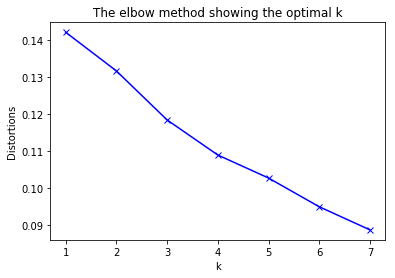

In [33]:
#Plot the elbow
import matplotlib.pyplot as plt

plt.plot(K, distortions,  'bx-')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('The elbow method showing the optimal k')
plt.show()

Base on the Elbow chart, I choose k=5 for the optimum k of K-Means

In [34]:
# set number of clusters
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(singapore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 4, 0, 4, 0, 0, 0, 0, 0], dtype=int32)

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [36]:
singapore_merged = kl_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
singapore_merged = singapore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

singapore_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Naumi Hotel,1.295770,103.855090,0,Hotel,Japanese Restaurant,Café,Chinese Restaurant,Bakery,Clothing Store,Dessert Shop,Shopping Mall,French Restaurant,Lounge
1,Damenlou Hotel,1.273698,103.845065,4,Coffee Shop,Japanese Restaurant,Bakery,Café,Hotel,Ramen Restaurant,Sushi Restaurant,Soup Place,Indian Restaurant,Shopping Mall
2,New Majestic Hotel,1.279323,103.840375,4,Italian Restaurant,Chinese Restaurant,Coffee Shop,Café,Japanese Restaurant,Korean Restaurant,Food Court,Dessert Shop,Cocktail Bar,Asian Restaurant
3,The Scarlet Hotel,1.280780,103.845290,4,Korean Restaurant,Coffee Shop,Cocktail Bar,Chinese Restaurant,Food Court,Bar,Restaurant,Beer Garden,Japanese Restaurant,Dessert Shop
4,Garcha Hotels,1.288350,103.847854,4,Japanese Restaurant,Hotel,Nightclub,Bar,Yoga Studio,History Museum,Coffee Shop,Food Court,French Restaurant,Gym


Finally, visualize the resulting clusters

In [37]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(singapore_merged['Latitude'], singapore_merged['Longitude'], singapore_merged['Neighborhood'], singapore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

Examine each cluster and determine the discriminating venue categories that distinguish each cluster

#### Cluster 1

In [38]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 0, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1.295770,Japanese Restaurant,Café,Chinese Restaurant,Bakery,Clothing Store,Dessert Shop,Shopping Mall,French Restaurant,Lounge
6,1.294650,Café,Japanese Restaurant,Shopping Mall,French Restaurant,Dessert Shop,Coffee Shop,Lounge,Chinese Restaurant,Event Space
7,1.294240,Hotel,Japanese Restaurant,Lounge,Shopping Mall,Cocktail Bar,French Restaurant,Chinese Restaurant,Dessert Shop,Concert Hall
8,1.298490,Hotel,Japanese Restaurant,Restaurant,Art Gallery,Yoga Studio,Bakery,Karaoke Bar,Ice Cream Shop,Bookstore
9,1.293200,Hotel,Shopping Mall,Japanese Restaurant,French Restaurant,Event Space,Cocktail Bar,Lounge,Coffee Shop,Italian Restaurant
10,1.293590,Japanese Restaurant,Hotel Bar,Buffet,Café,Bakery,Chinese Restaurant,Coffee Shop,Spa,Lounge
12,1.283250,Boutique,Theater,Nightclub,Bridge,Noodle House,Japanese Restaurant,Garden,Bar,Tea Room
13,1.291220,Japanese Restaurant,Café,Hotel Bar,Event Space,Bakery,Buffet,Dim Sum Restaurant,Coffee Shop,Shopping Mall
14,1.290230,Hotel,Café,Chinese Restaurant,Japanese Restaurant,Event Space,Buffet,Hotel Pool,Ice Cream Shop,Lounge
15,1.307690,Boutique,Japanese Restaurant,Café,Chinese Restaurant,Coffee Shop,Sushi Restaurant,Art Gallery,Department Store,Tea Room


#### Cluster 2

In [39]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 1, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,1.24901,Resort,Spanish Restaurant,Golf Course,Chinese Restaurant,Restaurant,Hotel,Italian Restaurant,Hotel Bar,Library


#### Cluster 3

In [40]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 2, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,1.311561,Indian Restaurant,Steakhouse,Italian Restaurant,Lounge,Dim Sum Restaurant,Dance Studio,Chinese Restaurant,Cantonese Restaurant,Seafood Restaurant


#### Cluster 4

In [41]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 3, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,1.257012,Bar,Historic Site,Theme Park,Resort,Restaurant,Breakfast Spot,Café,Coffee Shop,Hot Dog Joint
26,1.249820,Theme Park,Scenic Lookout,Spa,Resort,Indian Restaurant,Pool,Food Court,Café,Spanish Restaurant


#### Cluster 5

In [42]:
singapore_merged.loc[singapore_merged['Cluster Labels'] == 4, singapore_merged.columns[[1] + list(range(5, singapore_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,1.273698,Japanese Restaurant,Bakery,Café,Hotel,Ramen Restaurant,Sushi Restaurant,Soup Place,Indian Restaurant,Shopping Mall
2,1.279323,Chinese Restaurant,Coffee Shop,Café,Japanese Restaurant,Korean Restaurant,Food Court,Dessert Shop,Cocktail Bar,Asian Restaurant
3,1.280780,Coffee Shop,Cocktail Bar,Chinese Restaurant,Food Court,Bar,Restaurant,Beer Garden,Japanese Restaurant,Dessert Shop
4,1.288350,Hotel,Nightclub,Bar,Yoga Studio,History Museum,Coffee Shop,Food Court,French Restaurant,Gym
5,1.285880,Hostel,Japanese Restaurant,Seafood Restaurant,Chinese Restaurant,Café,Yoga Studio,Vegetarian / Vegan Restaurant,Spa,Miscellaneous Shop
11,1.285610,Chinese Restaurant,Gym / Fitness Center,Waterfront,Italian Restaurant,Japanese Restaurant,Salad Place,Bar,Café,Gym
28,1.291260,Hotel,Bar,Spa,Café,Ramen Restaurant,Nightclub,Seafood Restaurant,Bakery,Supermarket
29,1.291810,Hotel,Nightclub,Bar,Bakery,Café,Spa,Pub,Coffee Shop,Ramen Restaurant
